패키지 설치

In [83]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

In [2]:
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['font.size']=10
plt.rcParams['figure.figsize']=(7,4)
plt.rcParams['axes.unicode_minus']=False

데이터 준비

In [3]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
print(df.dtypes)

id                int64
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object


In [5]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx", index_col="id")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


# 문제 1

자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화

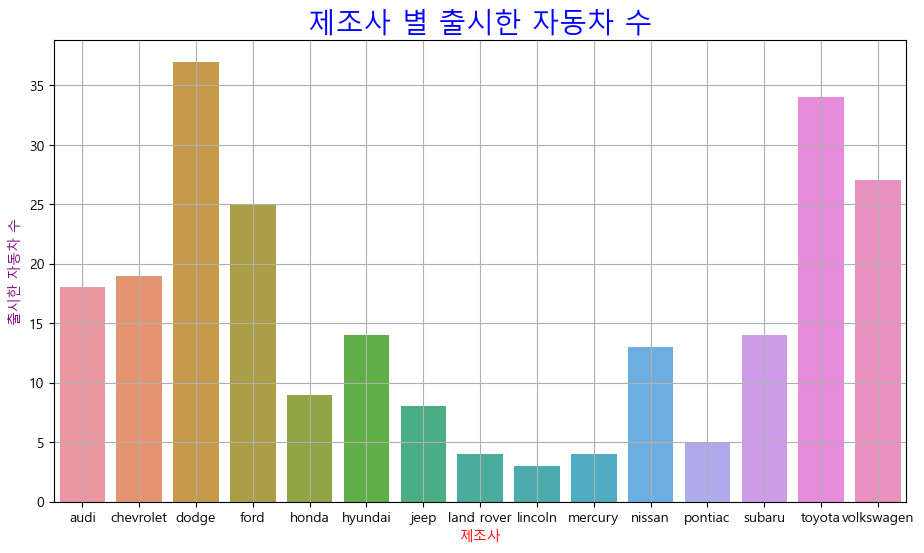

In [6]:
plt.rcParams['figure.figsize']=(11,6)
sb.countplot(data=df, x="manufacturer")
plt.title("제조사 별 출시한 자동차 수", fontsize=20, color="blue")
plt.xlabel("제조사", color="red")
plt.ylabel("출시한 자동차 수", color="purple")
plt.grid()
plt.show()
plt.close()

# 문제2

자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화

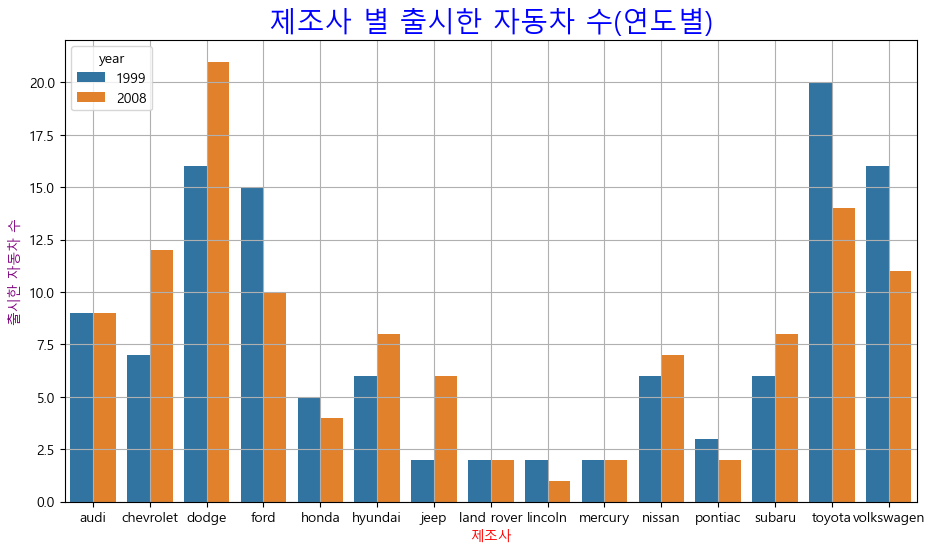

In [7]:
sb.countplot(data=df, x="manufacturer",
             hue="year")
plt.title("제조사 별 출시한 자동차 수(연도별)", fontsize=20, color="blue")
plt.xlabel("제조사", color="red")
plt.ylabel("출시한 자동차 수", color="purple")
plt.grid()
plt.show()
plt.close()

In [8]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

# 문제3

구동방식에 따른 자동차 수를 하나의 그래프로 시각화

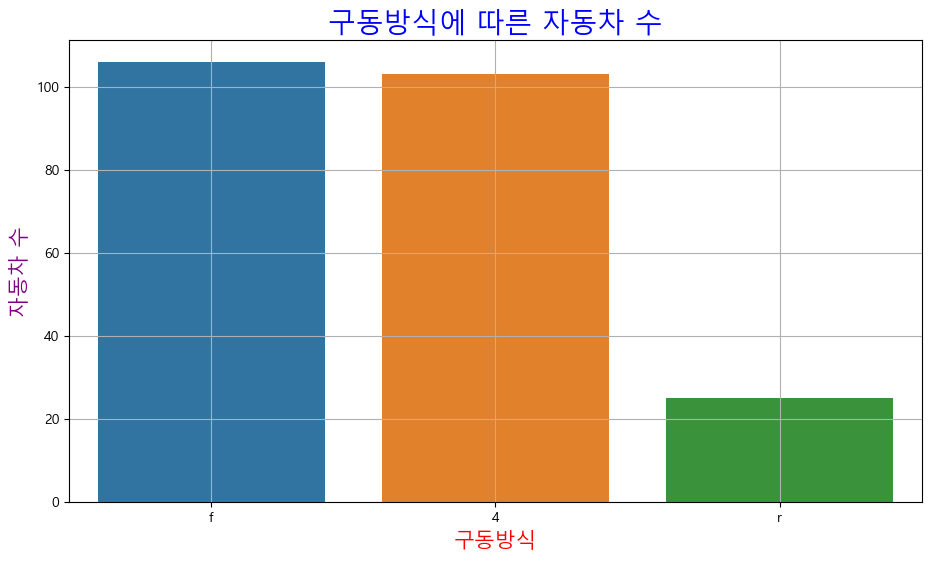

In [9]:
sb.countplot(data=df, x="drv")
plt.title("구동방식에 따른 자동차 수", fontsize=20, color="blue")
plt.xlabel("구동방식", color="red", fontsize = 15)
plt.ylabel("자동차 수", color="purple", fontsize = 15)
plt.grid()
plt.show()
plt.close()

# 문제4

자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화

In [10]:
print(df.columns)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


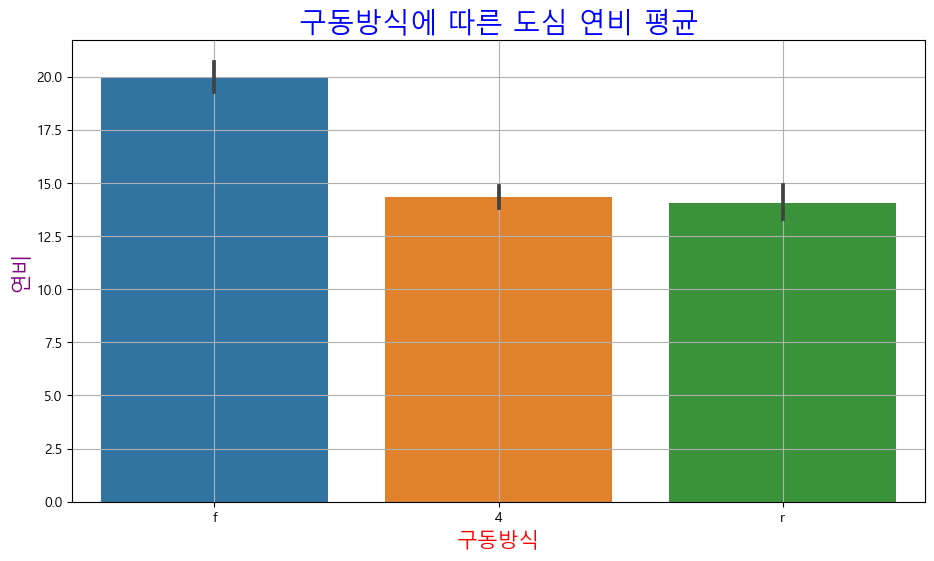

In [11]:
# barplot은 기본이 평균. 굳이 잡아 준다면 estimator='mean'
sb.barplot(data=df,
           x="drv",
           y="cty")
plt.title("구동방식에 따른 도심 연비 평균", fontsize=20, color="blue")
plt.xlabel("구동방식", color="red", fontsize = 15)
plt.ylabel("연비", color="purple", fontsize = 15)
plt.grid()
plt.show()
plt.close()

# 문제5

자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화

In [12]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

<Axes: xlabel='manufacturer'>

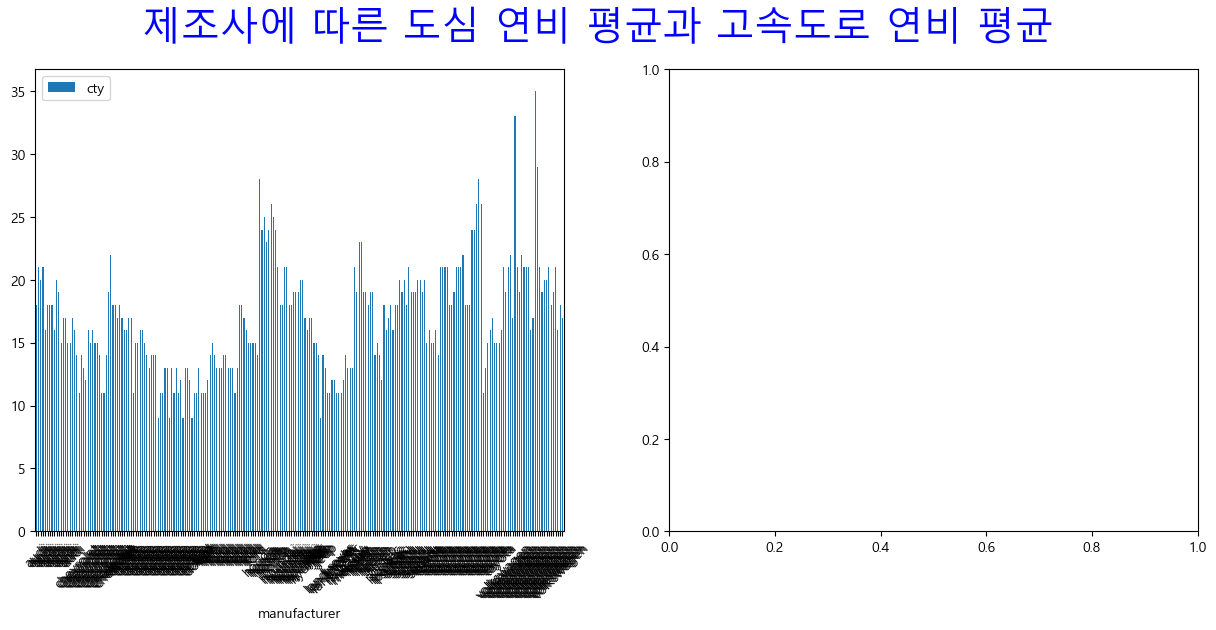

In [13]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 전체 제목
fig.suptitle("제조사에 따른 도심 연비 평균과 고속도로 연비 평균", fontsize = 28, color = 'blue')

df.plot.bar(ax=ax1, x="manufacturer", y="cty", rot=45)

# 문제6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함

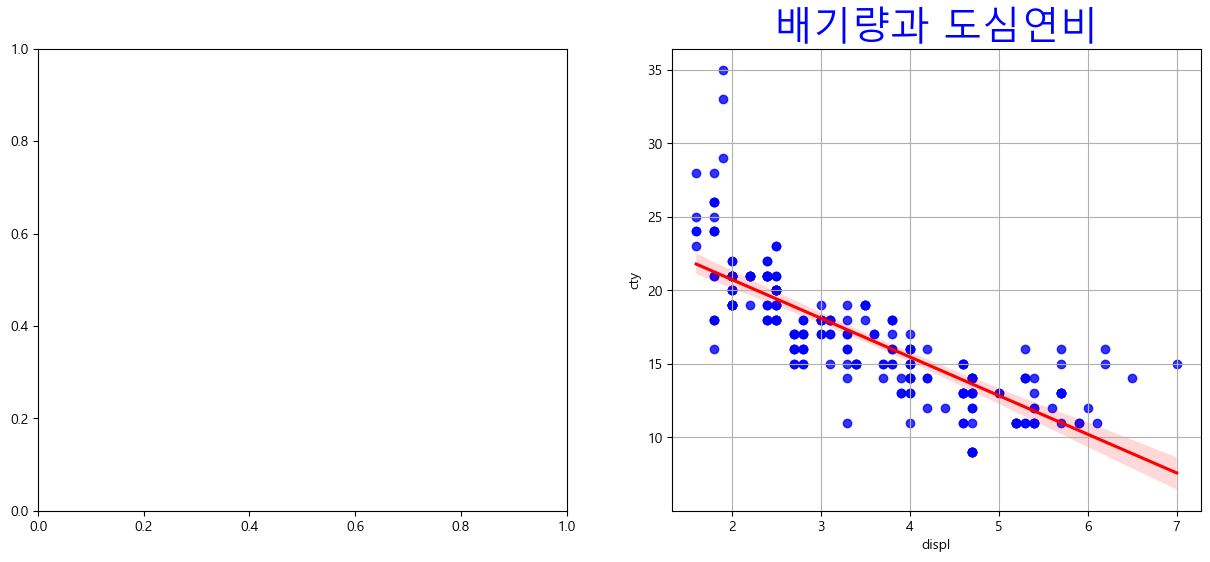

In [14]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))

sb.regplot(data=df, 
               x='displ', y='cty',
               line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
# sb.regplot(data=df, 
#                x='displ', y='hwy',
#                line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})
plt.title("배기량과 도심연비", fontsize = 28, color = 'blue')
plt.grid()
plt.show()
plt.close()

# 문제 7

## 데이터 전처리

1. 평균 연비에 대한 파생변수 생성

In [36]:
print(df.columns)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


In [37]:
df1 = df.copy()
df1['평균'] = df1[df1.columns[7:9]].mean(axis=1)
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0


2. 전체 평균연비에 대한 평균값을 구하고 이 평균값보다 평균연비가 높은 경우 'Pass', 그렇지 않을 경우 'Fail'로 표시할 수 있는 파생변수를 `평가`라는 이름으로 추가

In [38]:
print(df1.dtypes)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
평균              float64
dtype: object


In [46]:
df1_mean = df1['평균'].mean()
df1_mean

20.14957264957265

In [53]:
# 펵가를 부여하기 위한 연비 구간을 설정하는 조건을 리스트로 설정

conditions = [(df1['평균'] >= df1_mean)]

# 조건에 따라 부여될 펵가
value = ['Pass']

df1['평가'] = np.select(conditions, value, default='Fail')
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균,평가
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass


In [58]:
print(df1.dtypes)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
평균              float64
평가               object
dtype: object


3. 평균연비에 대한 백분율을 구한 후 90점 이상일 경우 A, 80점 이상일 경우 B, 70점 이상일 경우 C, 그 외의 경우는 D로 하여 등급이라는 컬럼을 추가

In [54]:
df1_mean = df1['평균'].mean()
df1_mean

20.14957264957265

In [65]:
# 분산 생성
df1['분산'] = (df1['평균'] / df1_mean) * 100
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균,평가,분산
id,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,116.627784
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,124.072110
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,126.553552
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,126.553552
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,104.220573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,116.627784
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,124.072110
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,104.220573


In [66]:
print(df1.dtypes)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
평균              float64
평가               object
분산              float64
dtype: object


In [68]:
# 백분율을 사용한 `등급` 생성

conditions = [  (df1['분산'] >= 90),   # A
                (df1['분산'] >= 80),   # B
                (df1['분산'] >= 70)    # C
]

# 조건에 따라 부여될 학점
value = ['A', 'B', 'C']

df1['등급'] = np.select(conditions, value, default='D')
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,평균,평가,분산,등급
id,,,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,116.627784,A
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,124.072110,A
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,126.553552,A
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,126.553552,A
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,104.220573,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,116.627784,A
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,124.072110,A
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,104.220573,A


## 서브플롯 그래프

- 자동차 `구동방식`별 `평가`에 대한 빈도
- 자동차 `구동방식`별 `등급`에 대한 빈도
- 자동차 `연료` 종류별 `평가`에 대한 빈도
- 자동차 `연료` 종류별 `등급`에 대한 빈도
- 자동차 `분류`별 `평가`에 대한 빈도
- 자동차 `분류`별 `등급`에 대한 빈도

In [78]:
print(df1.columns)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class', '평균', '평가', '분산', '등급'],
      dtype='object')


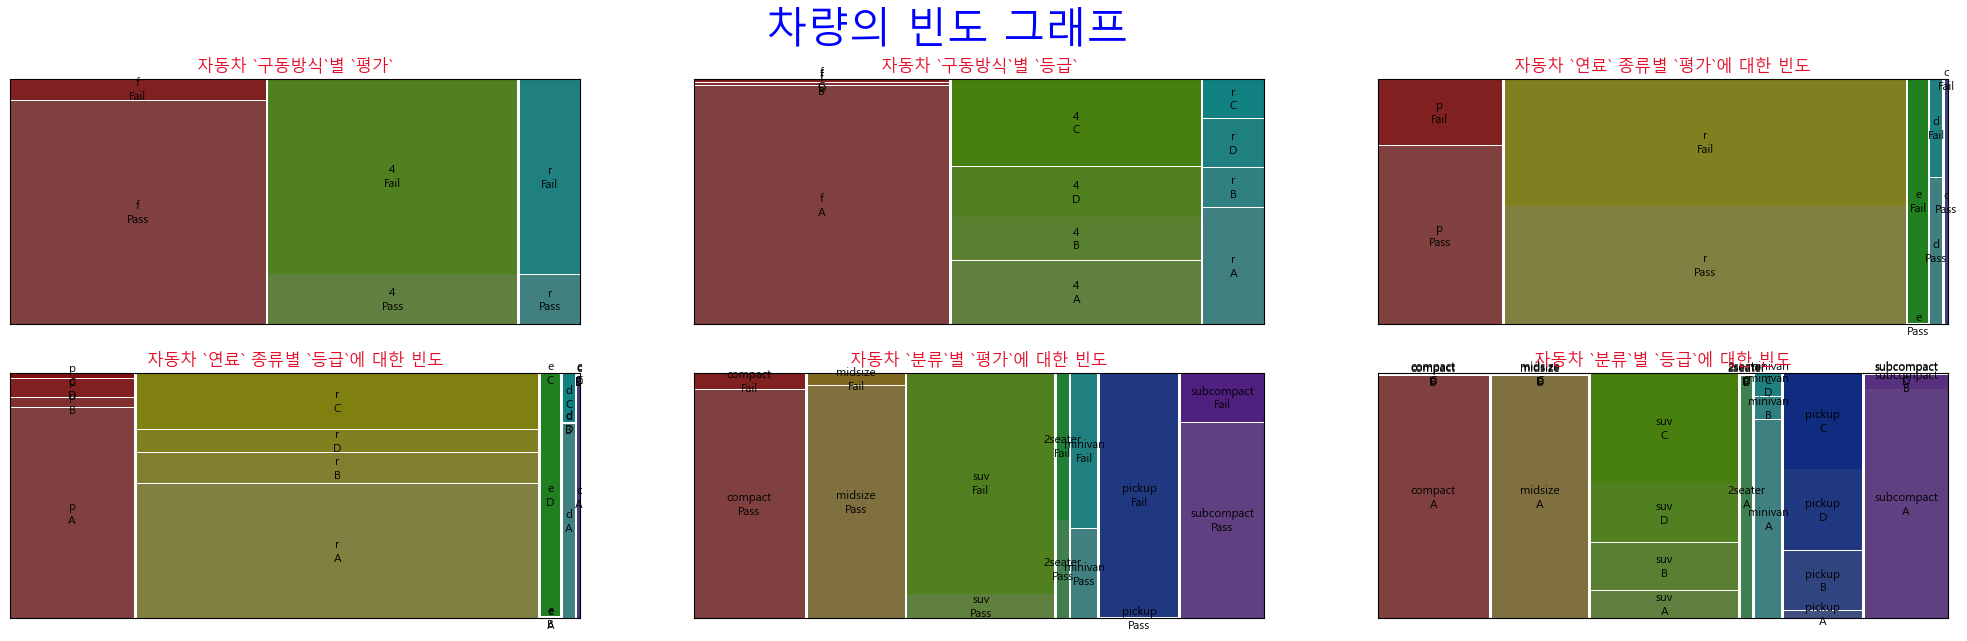

In [91]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(25, 7))
# 서브플롯 메인 제목
fig.suptitle('차량의 빈도 그래프', fontsize=30, color='blue')
# 각 그래프의 가로(wspace), 세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2)


#----------
# ax1
#---------- 
mosaic(df1,["drv", "평가"], axes_label=False, ax=ax1)
ax1.title.set_text("자동차 `구동방식`별 `평가`")
ax1.title.set_fontsize(12)
ax1.title.set_color("#e30e2a")

#----------
# ax2
#---------- 
mosaic(df1,["drv", "등급"], axes_label=False, ax=ax2)
ax2.title.set_text("자동차 `구동방식`별 `등급`")
ax2.title.set_fontsize(12)
ax2.title.set_color("#e30e2a")

#----------
# ax3
#---------- 
mosaic(df1,["fl", "평가"], axes_label=False, ax=ax3)
ax3.title.set_text("자동차 `연료` 종류별 `평가`에 대한 빈도")
ax3.title.set_fontsize(12)
ax3.title.set_color("#e30e2a")

#----------
# ax4
#---------- 
mosaic(df1,["fl", "등급"], axes_label=False, ax=ax4)
ax4.title.set_text("자동차 `연료` 종류별 `등급`에 대한 빈도")
ax4.title.set_fontsize(12)
ax4.title.set_color("#e30e2a")

#----------
# ax5
#---------- 
mosaic(df1,["class", "평가"], axes_label=False, ax=ax5)
ax5.title.set_text("자동차 `분류`별 `평가`에 대한 빈도")
ax5.title.set_fontsize(12)
ax5.title.set_color("#e30e2a")

#----------
# ax6
#---------- 
mosaic(df1,["class", "등급"], axes_label=False, ax=ax6)
ax6.title.set_text("자동차 `분류`별 `등급`에 대한 빈도")
ax6.title.set_fontsize(12)
ax6.title.set_color("#e30e2a")

plt.show()
plt.close()